In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install openpyxl

In [5]:
import pandas as pd

# Replace 'your_file_name.xlsx' with the actual path to your Excel file
df = pd.read_excel("C:\\Users\\Aman Bisen\\Desktop\\gba playstore commnets'.xlsx")

# Display the first 5 rows of the DataFrame
print(df.head(20))

    score  Unnamed: 1                                               text  \
0       1         NaN                                                bad   
1       1         NaN  Such a worst app which doesn't provide proper ...   
2       5         NaN                                          good one.   
3       5         NaN                                        as expected   
4       3         NaN                                               nice   
5       4         NaN                                       good service   
6       1         NaN            Platform fees very high Now it is Rs 12   
7       4         NaN                                          excellent   
8       4         NaN                                               good   
9       5         NaN                                          Tooo good   
10      1         NaN  I order by mistake food and cancelled immediat...   
11      1         NaN  Zomato = food ka lucky draw  Order full pay ka...   
12      1   

In [6]:
!pip install nltk

In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Aman
[nltk_data]     Bisen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [34]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

def preprocess_reviews_optimized(file_path, text_column_name, output_file_name='preprocessed_reviews_optimized.xlsx'):
    """
    Imports an Excel file and efficiently preprocesses a specified text column using vectorized operations.

    Preprocessing steps:
    1. Handle missing values.
    2. Convert text to lowercase.
    3. Tokenize text.
    4. Remove special characters.
    5. Remove stopwords.

    Args:
        file_path (str): The path to the input Excel file.
        text_column_name (str): The name of the column containing the text.
        output_file_name (str): The name for the output Excel file.
    """
    try:
        # Download necessary NLTK data if not present
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)

        # 1. Import the Excel file
        df = pd.read_excel(file_path)
        print(f"Original DataFrame loaded. Shape: {df.shape}")

        if text_column_name not in df.columns:
            print(f"Error: Column '{text_column_name}' not found.")
            return

        # 2. Handle missing values and ensure string type
        df.dropna(subset=[text_column_name], inplace=True)
        df['original_text'] = df[text_column_name].astype(str)
        print(f"DataFrame shape after handling missing values: {df.shape}")

        # --- Vectorized Preprocessing using .apply() ---

        # 3. Lowercasing
        df['text_lowercase'] = df['original_text'].apply(lambda x: x.lower())

        # 4. Remove special characters
        df['text_no_special_chars'] = df['text_lowercase'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

        # 5. Tokenization
        df['text_tokenized'] = df['text_no_special_chars'].apply(word_tokenize)

        # 6. Remove stopwords
        stop_words = set(stopwords.words('english'))
        df['text_no_stopwords'] = df['text_tokenized'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

        # For saving to Excel, it's often better to join token lists back into strings
        df['text_tokenized_str'] = df['text_tokenized'].apply(' '.join)
        df['text_no_stopwords_str'] = df['text_no_stopwords'].apply(' '.join)

        # Reorder columns for clarity
        final_columns = [col for col in df.columns if col.startswith('text_') or col in ['original_text']]
        other_columns = [col for col in df.columns if col not in final_columns and col != text_column_name]
        df = df[other_columns + ['original_text', 'text_lowercase', 'text_no_special_chars', 'text_tokenized_str', 'text_no_stopwords_str']]

        # Save the preprocessed DataFrame
        df.to_excel(output_file_name, index=False)
        print(f"\nPreprocessing complete! Updated data saved to '{output_file_name}'.")
        print("Here are the first 5 rows of the preprocessed data:")
        print(df.head())

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- How to Use ---
# 1. Replace 'your_google_play_reviews.xlsx' with your file name.
# 2. Replace 'review_text_column' with the actual name of your review column.
input_excel_file = "C:\\Users\\Aman Bisen\\Desktop\\gba playstore commnets'.xlsx"
review_column_name = 'text' # This MUST match the column name in your file
output_excel_file = 'aman_b.xlsx'

# Run the optimized function
preprocess_reviews_optimized(input_excel_file, review_column_name, output_excel_file)

Original DataFrame loaded. Shape: (300, 4)
DataFrame shape after handling missing values: (293, 5)

Preprocessing complete! Updated data saved to 'aman_b.xlsx'.
Here are the first 5 rows of the preprocessed data:
   score  Unnamed: 1  thumbsUp  \
0      1         NaN         0   
1      1         NaN         0   
2      5         NaN         0   
3      5         NaN         0   
4      3         NaN         0   

                                       original_text  \
0                                                bad   
1  Such a worst app which doesn't provide proper ...   
2                                          good one.   
3                                        as expected   
4                                               nice   

                                      text_lowercase  \
0                                                bad   
1  such a worst app which doesn't provide proper ...   
2                                          good one.   
3                    

In [36]:
# This line saves the entire DataFrame, with old and new columns, to an Excel file.
df.to_excel(output_excel_file, index=False)

In [37]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/624.3 kB 357.1 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/624.3 kB 357.1 kB/s eta 0:00:01
   -------------------------------------- 624.3/624.3 kB 286.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
from textblob import TextBlob

# --- Step 1: PLEASE VERIFY THESE TWO VARIABLES ---
# Make sure this is the EXACT name of your preprocessed file.
# Common names might be 'preprocessed_google_play_reviews.xlsx' or 'preprocessed_google_play_reviews_optimized.xlsx'
input_file_name = 'preprocessed_google_play_reviews_optimized.xlsx'

# Make sure this is the EXACT name of the column with the cleaned text.
# Common names might be 'text_no_stopwords_str' or 'review_no_stopwords'
column_to_analyze = 'text_no_stopwords_str'

# This will be the name of your final output file.
output_file_name = 'reviews_with_sentiment.xlsx'


# --- Step 2: Run the Analysis ---
try:
    # Load the preprocessed Excel file
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'. Shape: {df.shape}")

    # --- Data Validation ---
    # Check if the specified column exists before we do anything else
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")

    # IMPORTANT: Ensure the column is treated as text (string).
    # This prevents errors if a cell contains numbers or is empty.
    df[column_to_analyze] = df[column_to_analyze].astype(str)
    print(f"Ready to analyze the content of the '{column_to_analyze}' column.")

    # --- Sentiment Analysis Functions ---
    def get_sentiment_score(text):
        """Calculates sentiment polarity score using TextBlob."""
        return TextBlob(text).sentiment.polarity

    def get_sentiment_category(score):
        """Categorizes the sentiment based on the polarity score."""
        if score > 0.05:  # A small threshold to be more confidently positive
            return 'Positive'
        elif score < -0.05: # A small threshold to be more confidently negative
            return 'Negative'
        else:
            return 'Neutral'

    # --- Apply Functions to the DataFrame ---
    # Create the 'sentiment_score' column by applying the function to our target column
    df['sentiment_score'] = df[column_to_analyze].apply(get_sentiment_score)
    print("Sentiment scores have been calculated.")

    # Create the 'sentiment_category' column
    df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)
    print("Sentiment categories have been assigned.")

    # --- Save the Final Results ---
    df.to_excel(output_file_name, index=False)
    print(f"\nSUCCESS! Analysis complete. The new file is saved as '{output_file_name}'.")

    # --- Display a Preview ---
    print("\nHere is a preview of your results:")
    # We show the column we analyzed plus the two new columns
    print(df[[column_to_analyze, 'sentiment_score', 'sentiment_category']].head())

    print("\nSummary of sentiment distribution:")
    print(df['sentiment_category'].value_counts())

except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---")
    print(f"The file named '{input_file_name}' was not found.")
    print("TROUBLESHOOTING: Please check that the file name is spelled correctly and that it is in the same folder as your Jupyter Notebook.")

except KeyError as e:
    print(f"--- ERROR: Column Not Found ---")
    print(f"{e}")
    print("TROUBLESHOOTING: Please check that the variable 'column_to_analyze' exactly matches a column name in your Excel file.")
    print("\nHere are the actual column names in your file:")
    # This will print the list of available columns to help you find the correct one
    print(df.columns.tolist())

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'preprocessed_google_play_reviews_optimized.xlsx'. Shape: (293, 8)
Ready to analyze the content of the 'text_no_stopwords_str' column.
Sentiment scores have been calculated.
Sentiment categories have been assigned.

SUCCESS! Analysis complete. The new file is saved as 'reviews_with_sentiment.xlsx'.

Here is a preview of your results:
                               text_no_stopwords_str  sentiment_score  \
0                                                bad        -0.700000   
1  worst app doesnt provide proper call support s...        -0.197538   
2                                           good one         0.700000   
3                                           expected        -0.100000   
4                                               nice         0.600000   

  sentiment_category  
0           Negative  
1           Negative  
2           Positive  
3           Negative  
4           Positive  

Summary of sentiment distribution:
sentiment_category
Positive    

In [41]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 9.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 9.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 8.8 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 7.9 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.3 MB 6.1 MB/s eta 0:00:01
   ------------------------------------ --- 2.1/2.3 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.0 MB 4.8 MB/s eta 0:00:02
   ---------- -------------------

In [43]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Successfully loaded 'reviews_with_sentiment.xlsx'.

Counts of each sentiment category:
sentiment_category
Positive    210
Neutral      47
Negative     36
Name: count, dtype: int64


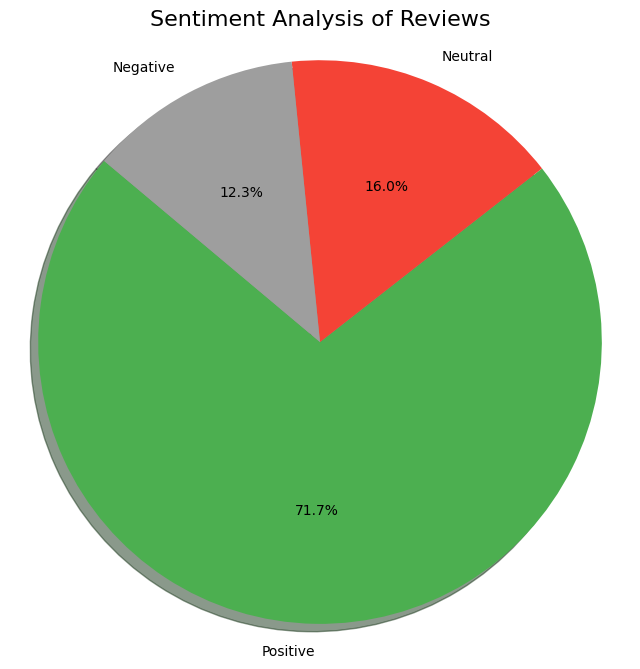

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
# This should be the name of the file you just created with the sentiment scores
input_file_name = 'reviews_with_sentiment.xlsx'
# This is the column we want to visualize
column_to_plot = 'sentiment_category'

try:
    # 1. Load the data from the Excel file
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'.")

    # 2. Count the occurrences of each sentiment category
    # The .value_counts() method does this for us and is perfect for plotting
    sentiment_counts = df[column_to_plot].value_counts()
    print("\nCounts of each sentiment category:")
    print(sentiment_counts)

    # --- 3. Create the Pie Chart ---

    # Set the figure size for better readability
    plt.figure(figsize=(8, 8))

    # Define custom colors to make the chart more intuitive
    colors = ['#4CAF50', '#F44336', '#9E9E9E'] # Green for Positive, Red for Negative, Grey for Neutral

    # Create the pie chart with labels, percentages, and custom colors
    plt.pie(sentiment_counts,
            labels=sentiment_counts.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            shadow=True)

    # Add a title to the chart
    plt.title('Sentiment Analysis of Reviews', fontsize=16)

    # Ensure the pie chart is a circle
    plt.axis('equal')

    # Display the chart
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{input_file_name}' was not found. Please ensure the file name is correct and it's in the same directory.")
except KeyError:
    print(f"Error: The column '{column_to_plot}' was not found in the file. Please check the column names in your Excel file.")
except Exception as e:
    print(f"An error occurred: {e}")

In [52]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: PLEASE VERIFY THESE VARIABLES ---
# This MUST be the exact name of your Excel file with sentiment data.
input_file_name = 'reviews_with_sentiment.xlsx'

# This MUST be the exact name of the column with cleaned text.
# Check your Excel file for the correct name. Common names are 'text_no_stopwords_str' or 'review_no_stopwords'.
column_to_analyze = 'text_no_stopwords_str'

# The number of topics you want to find.
num_topics = 5


def display_topics(model, feature_names, num_top_words):
    """A helper function to print the topics in a readable format."""
    for topic_idx, topic in enumerate(model.components_):
        # topic.argsort() returns the indices that would sort the array.
        # [:-num_top_words - 1:-1] slices this to get the indices of the top words.
        top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_word_indices]
        print(f"Topic #{topic_idx}: {' '.join(top_words)}")


# --- Step 2: Run the Topic Modeling ---
try:
    # Load the data
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'. Shape: {df.shape}")

    # --- Data Validation ---
    # 1. Check if the column actually exists
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")

    # 2. Handle missing values and ensure data is string type
    df.dropna(subset=[column_to_analyze], inplace=True)
    df[column_to_analyze] = df[column_to_analyze].astype(str)

    # 3. Check if we have any data left to analyze
    if df.empty:
        raise ValueError("The DataFrame is empty after removing rows with no text. Cannot perform topic modeling.")

    # Isolate the text data for modeling
    text_data = df[column_to_analyze]
    print(f"Performing topic modeling on {len(text_data)} reviews.")

    # --- Vectorize the Text (Convert text to numbers) ---
    # This step creates the vocabulary and the document-term matrix.
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
    
    # We wrap this in a separate try-except to catch a specific common error
    try:
        tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
        tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    except ValueError as ve:
        print(f"--- ERROR during Vectorization ---")
        print(f"{ve}")
        print("\nThis often means that after filtering, no words were left in the vocabulary.")
        print("TRY THIS: Lower the 'min_df' value in the TfidfVectorizer (e.g., from 5 to 2) and run again.")
        # We exit here if vectorization fails
        exit()

    # --- Apply NMF Model ---
    print(f"\nFitting NMF model to find {num_topics} topics...")
    nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvda').fit(tfidf_matrix)

    # --- Display the Results ---
    print("\n--- Discovered Topics ---")
    # Display the top 10 words for each topic
    display_topics(nmf_model, tfidf_feature_names, 10)


except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---")
    print(f"The file named '{input_file_name}' was not found.")
    print("TROUBLESHOOTING: Check that the file name is spelled correctly and is in the same folder as your notebook.")

except KeyError as e:
    print(f"--- ERROR: Column Not Found ---")
    print(f"{e}")
    print("TROUBLESHOOTING: Check that the 'column_to_analyze' variable at the top of the script exactly matches a column name in your Excel file.")
    print("\nHere are the actual column names in your file:")
    print(df.columns.tolist())

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'reviews_with_sentiment.xlsx'. Shape: (293, 10)
Performing topic modeling on 290 reviews.

Fitting NMF model to find 5 topics...

--- Discovered Topics ---
Topic #0: good experience delivery service food offers time useful fast behaviour
Topic #1: nice offers app platform delivery zomato great service swiggy thing
Topic #2: app best food love useful great bad offers delivery fraud
Topic #3: service excellent best amazing great fast super delivery care deliver
Topic #4: zomato order delivery food support worst time experience customer ordered


Successfully loaded 'reviews_with_sentiment.xlsx'.
Running topic modeling...
Topic modeling complete. Generating charts...


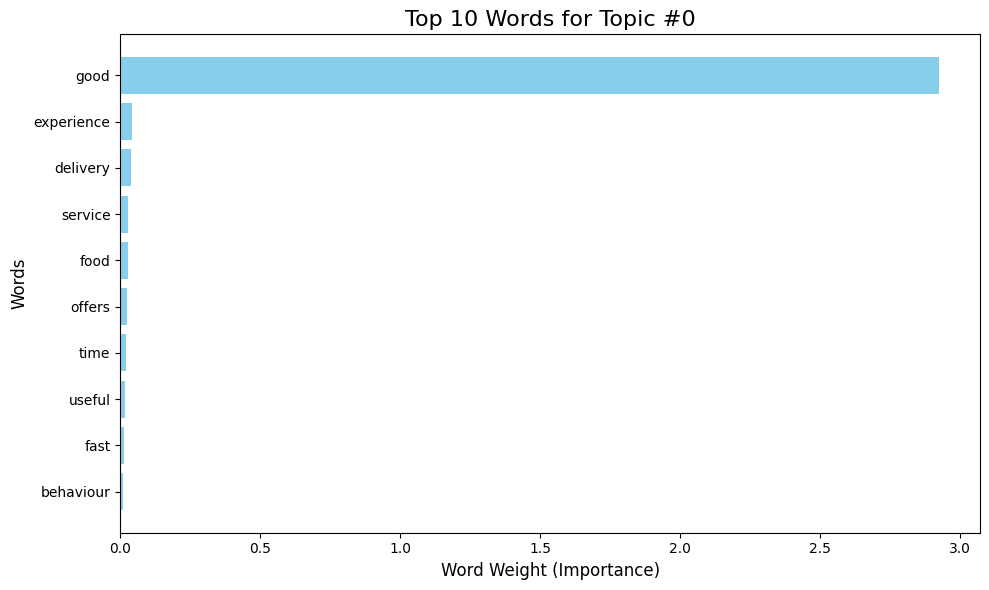

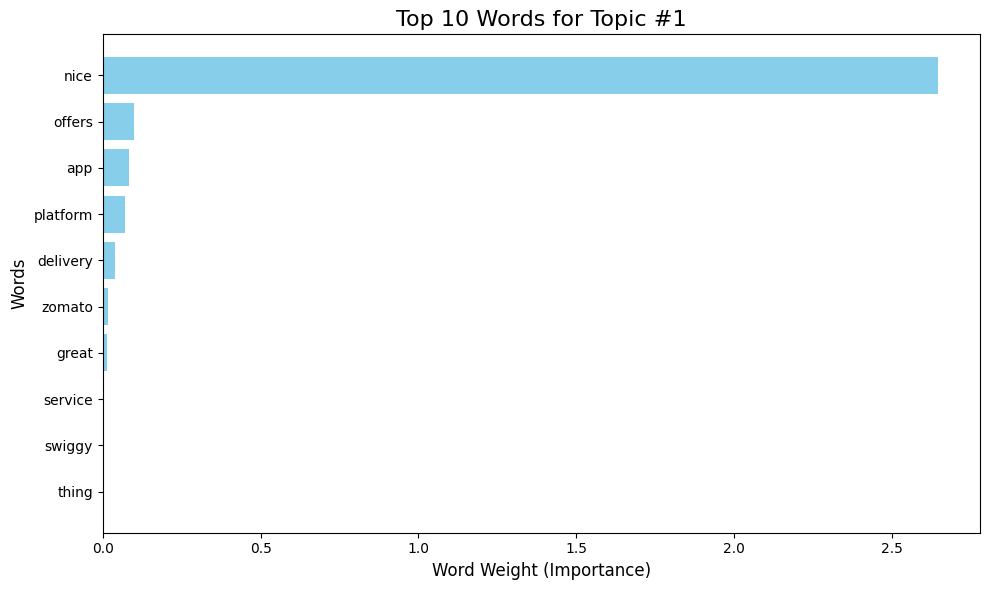

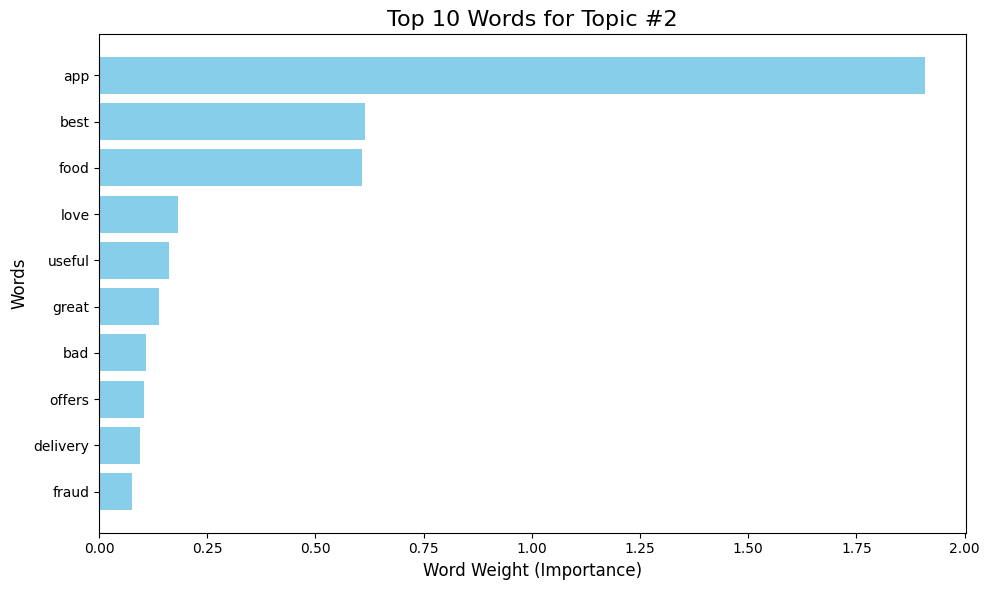

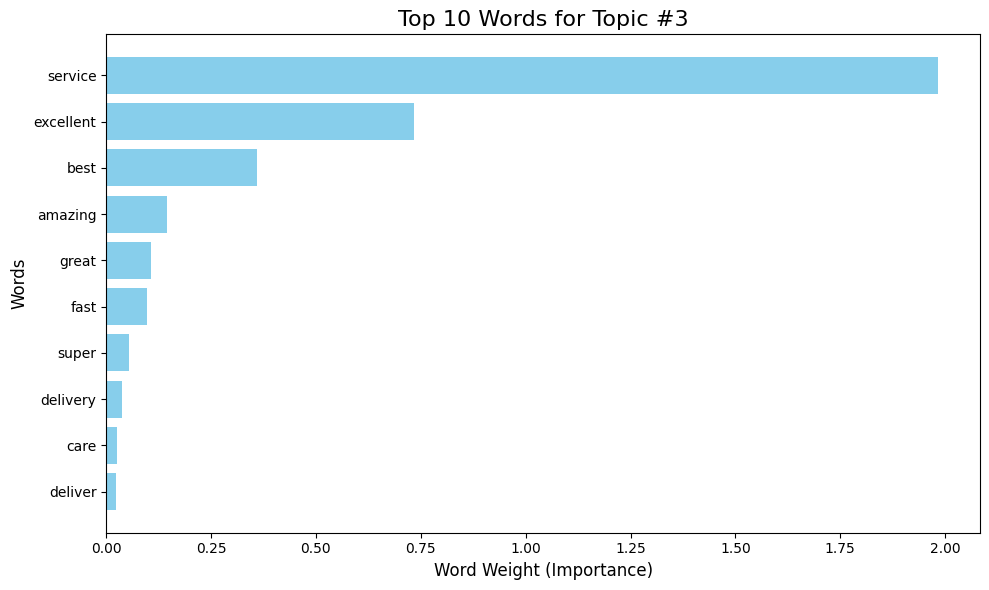

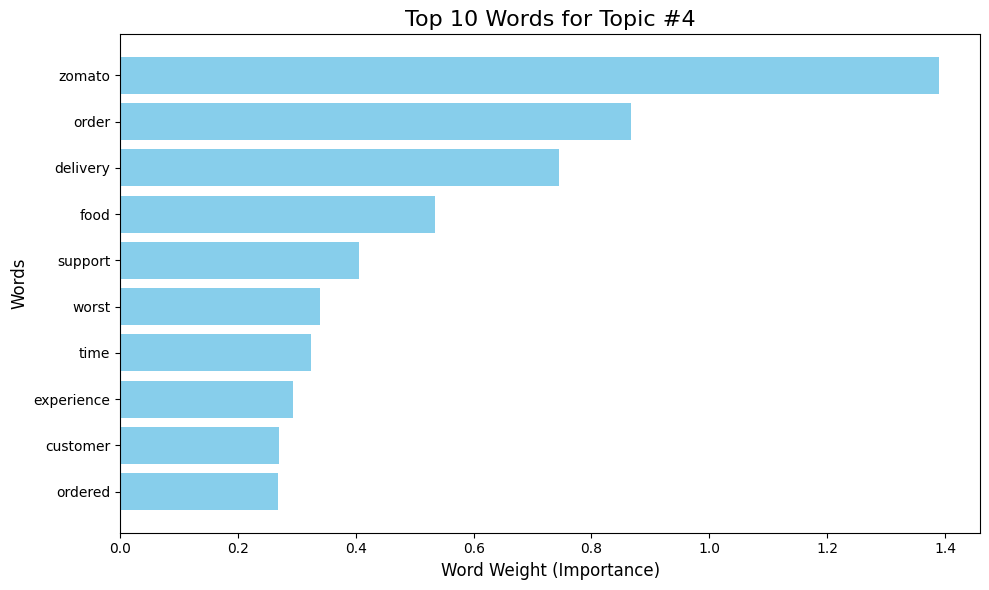

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: Configuration ---
# This MUST be the exact name of your Excel file with sentiment data.
input_file_name = 'reviews_with_sentiment.xlsx'

# This MUST be the exact name of the column with cleaned text.
column_to_analyze = 'text_no_stopwords_str'

# The number of topics and top words to display in the charts.
num_topics = 5
num_top_words = 10


try:
    # --- Step 2: Load and Prepare Data ---
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'.")

    # Validate and clean the data
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")
    df.dropna(subset=[column_to_analyze], inplace=True)
    text_data = df[column_to_analyze].astype(str)
    if text_data.empty:
        raise ValueError("The text data is empty after cleaning. Cannot proceed.")

    # --- Step 3: Vectorize and Run NMF (same as before) ---
    print("Running topic modeling...")
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

    nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvda').fit(tfidf_matrix)
    print("Topic modeling complete. Generating charts...")

    # --- Step 4: Generate a Bar Chart for Each Topic ---
    for topic_idx, topic in enumerate(nmf_model.components_):
        # Get the indices of the top words for this topic
        top_word_indices = topic.argsort()[:-num_top_words - 1:-1]

        # Get the top words and their corresponding weights
        top_words = [tfidf_feature_names[i] for i in top_word_indices]
        top_weights = [topic[i] for i in top_word_indices]

        # --- Create the plot ---
        plt.figure(figsize=(10, 6)) # Set the figure size
        
        # Create a horizontal bar chart
        plt.barh(top_words, top_weights, color='skyblue')
        
        # Invert the y-axis so the most important word is at the top
        plt.gca().invert_yaxis()

        # Add titles and labels for clarity
        plt.title(f'Top {num_top_words} Words for Topic #{topic_idx}', fontsize=16)
        plt.xlabel('Word Weight (Importance)', fontsize=12)
        plt.ylabel('Words', fontsize=12)
        
        # Ensure the layout is tight so labels don't get cut off
        plt.tight_layout()
        
        # Display the plot
        plt.show()


except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---")
    print(f"The file named '{input_file_name}' was not found.")
except KeyError as e:
    print(f"--- ERROR: Column Not Found ---")
    print(f"{e}")
    print("\nHere are the actual column names in your file:")
    print(pd.read_excel(input_file_name).columns.tolist())
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [56]:
!pip install wordcloud

Successfully loaded 'reviews_with_sentiment.xlsx'.
Running topic modeling...
Topic modeling complete. Generating word clouds...


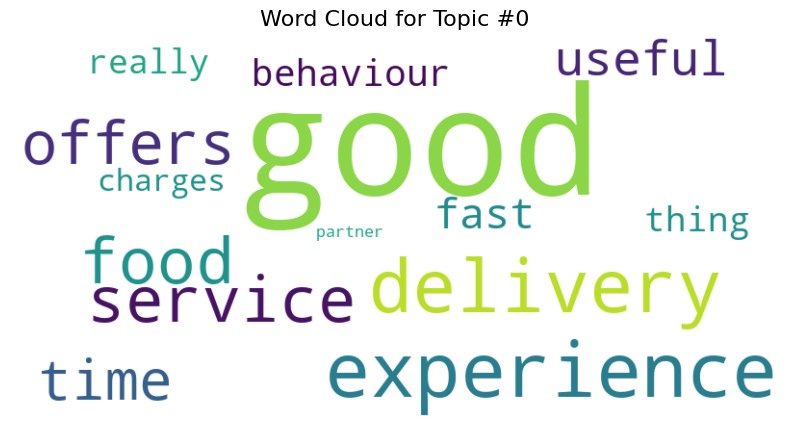

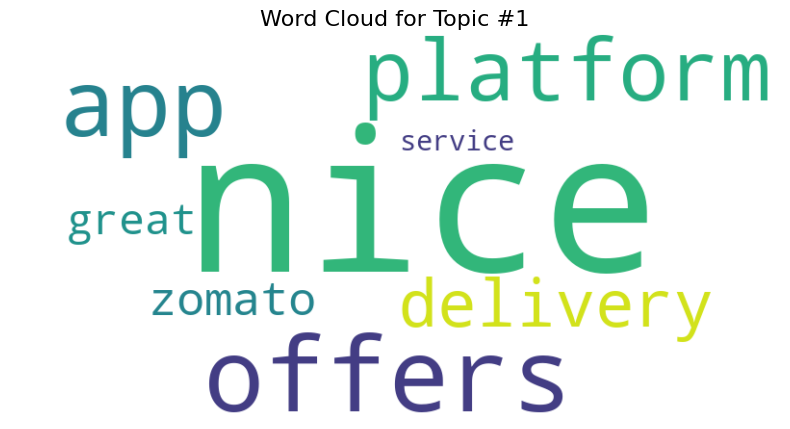

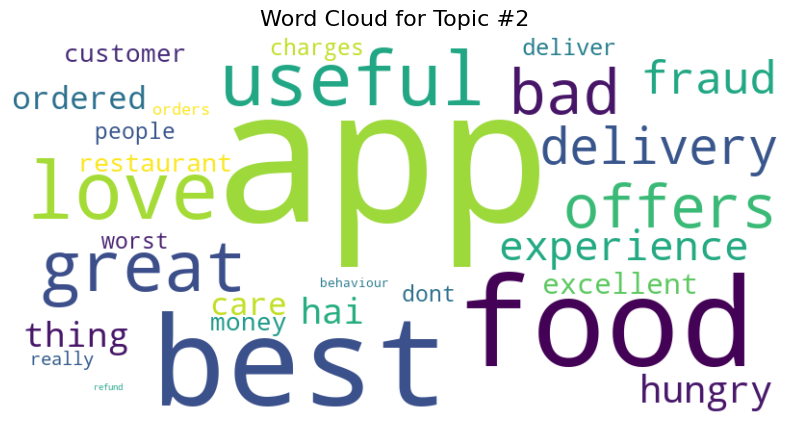

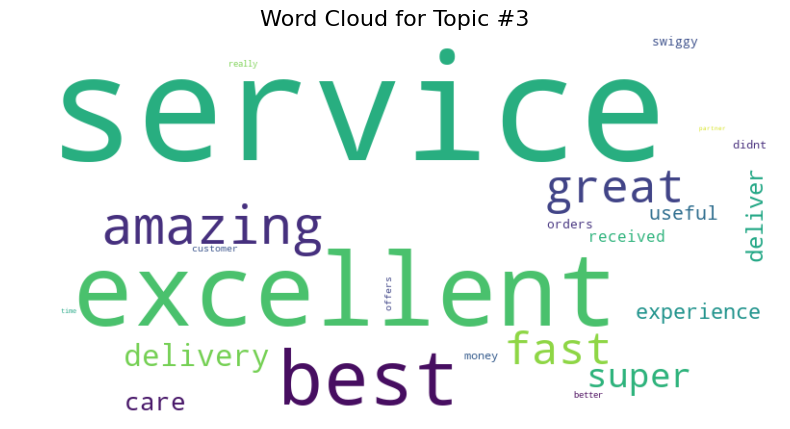

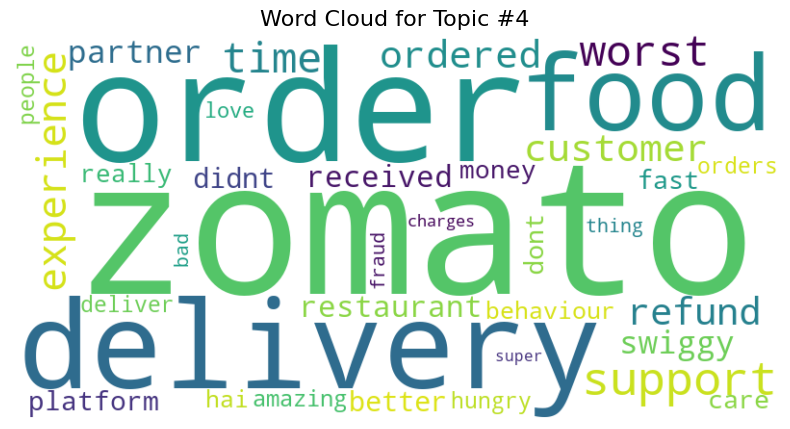

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud

# --- Step 1: Configuration ---
# This MUST be the exact name of your Excel file with sentiment data.
input_file_name = 'reviews_with_sentiment.xlsx'

# This MUST be the exact name of the column with cleaned text.
column_to_analyze = 'text_no_stopwords_str'

# The number of topics you want to find.
num_topics = 5


try:
    # --- Step 2: Load and Prepare Data ---
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'.")

    # Validate and clean the data
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")
    df.dropna(subset=[column_to_analyze], inplace=True)
    text_data = df[column_to_analyze].astype(str)
    if text_data.empty:
        raise ValueError("The text data is empty after cleaning. Cannot proceed.")

    # --- Step 3: Vectorize and Run NMF (same as before) ---
    print("Running topic modeling...")
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

    nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvda').fit(tfidf_matrix)
    print("Topic modeling complete. Generating word clouds...")

    # --- Step 4: Generate a Word Cloud for Each Topic ---

    # Get the vocabulary (list of words) from the vectorizer
    words = tfidf_vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(nmf_model.components_):
        # Create a dictionary of words and their weights for the current topic
        # The WordCloud object expects frequencies, so we'll use the NMF component weights
        topic_words = {words[i]: topic[i] for i in topic.argsort()[:-51:-1]} # Get top 50 words

        # Create the WordCloud object
        wordcloud = WordCloud(width=800,
                              height=400,
                              background_color='white',
                              colormap='viridis').generate_from_frequencies(topic_words)

        # --- Plot the Word Cloud ---
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Topic #{topic_idx}', fontsize=16)
        plt.axis('off') # Hide the axes
        plt.show()


except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---")
    print(f"The file named '{input_file_name}' was not found.")
except KeyError as e:
    print(f"--- ERROR: Column Not Found ---")
    print(f"{e}")
    print("\nHere are the actual column names in your file:")
    print(pd.read_excel(input_file_name).columns.tolist())
except Exception as e:
    print(f"An unexpected error occurred: {e}")